### **`Load Data From Kaggle `**

In [ ]:
# Optaining the Dataset (Gender Classification) From Kaggle
# Comment this partition after the 1st Run

# Install Kaggle Framework
# ! pip install -q kaggle
# Import Library for File Upload
# from google.colab import files
# Upload the Files
# files.upload()
# Create a New Folder
# ! mkdir ~/.kaggle
# Copy the Kaggle Profile .json Format file to the created directory
# ! cp kaggle.json ~/.kaggle/
# Change the Permission of the file to able it to run
# ! chmod 600 ~/.kaggle/kaggle.json
# Download the Chosen Dataset (Gender Classfication)
# !kaggle datasets download --force  cashutosh/gender-classification-dataset
# Create new Folder for the Dataset
# ! mkdir dataset
# Extract the Downloaded Dataset in this folder
# ! unzip gender-classification-dataset.zip -d dataset

### **Display Images Randomly**

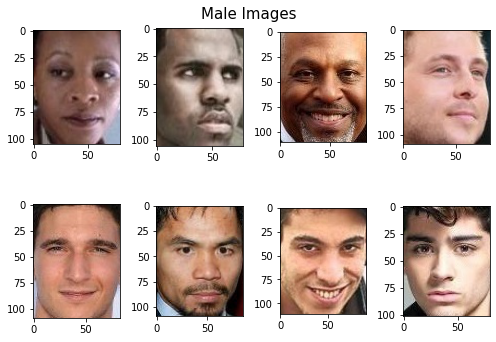

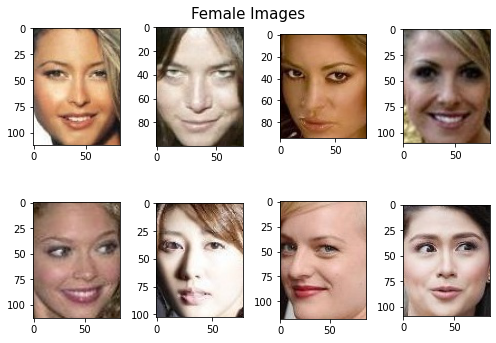

In [ ]:
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

# A Function to show 8 Random Images from each Gender
def show_image(dir):
    plt.figure(figsize=(7,5))                   # The Size of the Displayed Random Images
    for x in range(8):                          # Loop Over 8 Random Images from each Category
        plt.subplot(2,4,x+1)                    # Plot 2 Rows * 4 Columns Grid of Images
        img = random.choice(os.listdir(dir))    # Choose a Random Image from the Dataset Directory
        img = load_img(os.path.join(dir,img))   # Load the Chosen Image
        plt.subplots_adjust(hspace=0.3)         # Margin Space Between each Image
        x =dir.split("Training")[-1]            # Seperate the Last Directory from the Full Path (Male/Female)
        if x == "/male":                        # If the Image is Chosen from the Male Folder
            plt.suptitle("Male Images",fontsize=15)
        else:                                   # If the Image is Chosen from the Female Folder
            plt.suptitle("Female Images",fontsize=15)
        plt.imshow(img)                         # Plot the Grid of Chosen Images
    plt.tight_layout()                          # Adjust the Padding and the Grid Layout Display
train_male="dataset/Training/male"              # Specify the Path of the Male Folder
train_female="dataset/Training/female"          # Specify the Path of the Female Folder
show_image(train_male)                          # Display the Male Data
show_image(train_female)                        # Display the Female Data

### **Data PreProccessing**

In [ ]:
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization
from keras import regularizers
from keras import layers
from keras import utils
from keras.optimizers import Adam
import keras 
import numpy as np
from keras import models

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
path_train = "dataset/Training/"        # Specify the Path of the Training Data
path_test = "dataset/Validation/"       # Specify the Path of the Validation Data

# Generate batches of tensor image data with data augmentation.
train_generator = ImageDataGenerator(rescale = 1/255.0,       # Multiply the Data by the provided Number
                                     rotation_range=45,       # Degree Range for Random Rotations
                                     height_shift_range=0.2,  # Fraction of the Total Height
                                     shear_range=0.2,         # Shear angle in counter-clockwise direction in degrees
                                     zoom_range=0.2,          # Range for Random Zoom
                                     validation_split=0.2,    # Fraction of images reserved for validation 
                                     horizontal_flip=True)    # Randomly flip inputs horizontally

# Read the Images directly from the directory and augment them (Training Data)
train_data=train_generator.flow_from_directory(path_train,            # Provide the Training Set Path
                                            target_size=(150,150),    # The Pixel Number of the Target Image
                                            batch_size=32,            # Specify the Number of Images in each Batch
                                            class_mode='categorical', # Specify the Classification Mode
                                            color_mode='rgb',         # Specify (Red - Green - Blue) For Color Mode
                                            subset="training",        # Specify it as the Training Data
                                            shuffle=True)             # Shuffle the Training Data
                                            # Data isn't in the same order & the batches are not the exact same ones

# Read the Images directly from the directory and augment them (Testing Data)
val_data=train_generator.flow_from_directory(path_train, target_size=(150,150), batch_size=32,
                                           color_mode='rgb', class_mode='categorical', subset="validation")
train_data.class_indices

Found 37608 images belonging to 2 classes.
Found 9401 images belonging to 2 classes.


{'female': 0, 'male': 1}

In [ ]:
# from keras.utils import np_utils
# # tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()
# x_train, y_train,target_labels = load_dataset(path_train)
# x_test, y_test,_ = load_dataset(path_test)
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)

In [ ]:

# from keras.preprocessing import image
# import matplotlib.pyplot as plt
# #plt.figure(figsize=(7,5))
# x,y = gender_train.next()
# for i in range(0,9):
#     image = x[i]
#     label = y[i]
#     ax = plt.subplot(3,3,i+1)
#     plt.title(int(label))
#     plt.imshow(image)
# plt.show()
# print(x[0].shape)   #  (1,250,250,3)


In [ ]:
# FIRST MODEL (95% Accuracy)
# --------------------------
# model=models.Sequential()   # Initializing the Model Object

# # Input Layer (1st Layer)
# model.add(layers.Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
# model.add(layers.MaxPooling2D((2))) # A 2*2 Pooling Window choosing the Max Value

# # Adding 3 Convolutional Layers
# model.add(Conv2D(64,3,activation='relu'))
# model.add(layers.MaxPooling2D((2)))
# model.add(Conv2D(128,3,activation='relu'))
# model.add(MaxPooling2D((2,2)))
# model.add(Conv2D(256,3,activation='relu'))
# model.add(MaxPooling2D((2,2)))

# model.add(Flatten())  # Transfere the Grid into a 1 D Array
# model.add(Dense(256,activation='relu'))   # Dense for creating a Fully Connected Layer
# model.add(Dropout(0.1))                   # Remove Random Cells to prevent Overfitting
# model.add(Dense(2,activation='softmax'))  # Create the Output Layer (Probability for each Class)
# model.summary()

# SECOND MODEL (94% Accuracy)
# ---------------------------
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2,activation='softmax'))

# THIRD MODEL (Same as the FIRST)
# -------------------------------
# from keras.models import Sequential
# from keras.layers import Conv2D,MaxPooling2D
# from keras.layers import Activation, Dense, Flatten, Dropout,MaxPool2D
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ModelCheckpoint
# from keras import backend as K

# model = Sequential()
# model.add(Conv2D(32,3,activation='relu',input_shape=(250,250,3)))
# model.add(MaxPool2D())

# model.add(Conv2D(64,3,activation='relu'))
# model.add(Conv2D(128,3,activation='relu'))
# model.add(MaxPool2D())
# model.add(Dropout(0.50))
# model.add(Flatten()) 
# model.add(Dense(128,activation='relu'))
# model.add(Dense(2,activation='softmax'))
# model.summary()

In [ ]:
# Loss Function
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 75, 75, 64)       256       
 hNormalization)                                                 
                                                      

In [ ]:
# Fitting the Model
# Train Data, Steps/Epoch = N/Batch Size, Number of Epochs
# Validation Data, Validation Steps
model_Learnability=model.fit(train_data,steps_per_epoch=len(train_data),epochs=10,
                  validation_data=val_data,validation_steps=len(val_data))

Epoch 1/10
1176/1176 [==============================] - 260s 220ms/step - loss: 0.5701 - accuracy: 0.7725 - val_loss: 0.4285 - val_accuracy: 0.8153
Epoch 2/10
1176/1176 [==============================] - 253s 215ms/step - loss: 0.3383 - accuracy: 0.8563 - val_loss: 0.4504 - val_accuracy: 0.7907
Epoch 3/10
1176/1176 [==============================] - 252s 215ms/step - loss: 0.2432 - accuracy: 0.9048 - val_loss: 0.2681 - val_accuracy: 0.8883
Epoch 4/10
1176/1176 [==============================] - 252s 214ms/step - loss: 0.2017 - accuracy: 0.9211 - val_loss: 0.2213 - val_accuracy: 0.9125
Epoch 5/10
1176/1176 [==============================] - 249s 212ms/step - loss: 0.1880 - accuracy: 0.9299 - val_loss: 0.2251 - val_accuracy: 0.9084
Epoch 6/10
1176/1176 [==============================] - 251s 214ms/step - loss: 0.1796 - accuracy: 0.9317 - val_loss: 0.3276 - val_accuracy: 0.8491
Epoch 7/10
1176/1176 [==============================] - 251s 213ms/step - loss: 0.1707 - accuracy: 0.9363 - val_

In [ ]:
import math
score = model.evaluate_generator(val_data)
print('Test loss:', score[0])
print('Test accuracy:', math.ceil(score[1]*100),'%')

<ipython-input-35-5054cb404f06>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(val_data)


Test loss: 0.18784482777118683
Test accuracy: 94 %


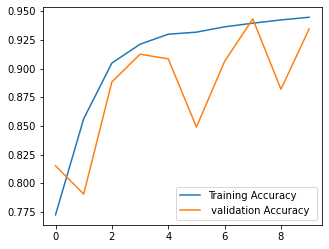

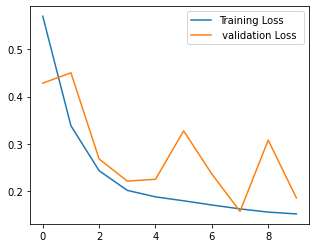

<Figure size 360x288 with 0 Axes>

In [ ]:
plt.plot( model_Learnability.history['accuracy'] , label='Training Accuracy ' )
plt.plot(model_Learnability.history['val_accuracy'], label=' validation Accuracy ' )
plt . legend()
plt . show()
plt.savefig('Training&validation')

plt.plot( model_Learnability.history['loss'] , label='Training Loss ' )
plt.plot(model_Learnability.history['val_loss'], label=' validation Loss ' )
plt . legend()
plt . show()
plt.savefig('Training&validation')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
test_generator=ImageDataGenerator(rescale = 1/255.0)
test_data=test_generator.flow_from_directory(path_test,
                                           target_size=(150,150),
                                           batch_size=1,
                                           color_mode='rgb',class_mode='categorical',
                                           shuffle=False)

# filenames = test_data.filenames
# nb_samples = len(filenames)
import math
score = model.evaluate_generator(test_data)
print('Test loss:', score[0])
print('Test accuracy:', math.ceil(score[1]*100),'%')
# predict = model.predict_generator(test_data,steps = nb_samples)
predict=model.predict_generator(generator=test_data, verbose = 1)
predict=predict.round(decimals=2)

Found 11649 images belonging to 2 classes.


<ipython-input-41-3c482aac2462>:12: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_data)


Test loss: 0.13829050958156586
Test accuracy: 96 %
   50/11649 [..............................] - ETA: 35s

<ipython-input-41-3c482aac2462>:16: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict=model.predict_generator(generator=test_data, verbose = 1)


11649/11649 [==============================] - 37s 3ms/step


In [ ]:
# c=0
# test_file_names=test_data.filenames  # sequential list of name of test files of each sample
# for p in predict:
#     print (p,test_file_names[c])
#     c+=1
#     if(c==5000):
#       break

In [ ]:
test_file_names=test_data.filenames  # sequential list of name of test files of each sample
test_labels=test_data.labels # is a sequential list  of test labels for each image sample
class_dict= test_data.class_indices # a dictionary where key is the class name and value is the corresponding label for the class
print (class_dict) # have a look at the dictionary
new_dict={} 
y_tr=[]
y_pr=[]
for key in class_dict: # set key in new_dict to value in class_dict and value in new_dict to key in class_dict
    value=class_dict[key]
    new_dict[value]=key
print('PREDICTED CLASS  TRUE CLASS       FILENAME ' ) # adjust spacing based on your class names
for i, p in enumerate(predict):
    pred_index=np.argmax(p) # get the index that has the highest probability
    pred_class=new_dict[pred_index]  # find the predicted class based on the index
    true_class=new_dict[test_labels[i]] # use the test label to get the true class of the test file
    file=test_file_names[i]
    print(f'    {pred_class}       {true_class}       {file}')

    if(true_class=="male"):
      y_tr.append(1)
    else:
      y_tr.append(0)
    if(pred_class=="male"):
      y_pr.append(1)
    else:
      y_pr.append(0)


Streaming output truncated to the last 5000 lines.
    male       male       male/067031.jpg.jpg
    male       male       male/067038.jpg.jpg
    male       male       male/067040.jpg.jpg
    male       male       male/067046.jpg.jpg
    male       male       male/067048.jpg.jpg
    male       male       male/067054.jpg.jpg
    male       male       male/067064.jpg.jpg
    male       male       male/067068.jpg.jpg
    male       male       male/067069.jpg.jpg
    male       male       male/067086.jpg.jpg
    male       male       male/067091.jpg.jpg
    male       male       male/067099.jpg.jpg
    male       male       male/067101.jpg.jpg
    male       male       male/067102.jpg.jpg
    male       male       male/067112.jpg.jpg
    male       male       male/067117.jpg.jpg
    male       male       male/067119.jpg.jpg
    male       male       male/067133.jpg.jpg
    male       male       male/067143.jpg.jpg
    male       male       male/067152.jpg.jpg
    male       male       mal

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5841
           1       0.94      0.96      0.95      5808

    accuracy                           0.95     11649
   macro avg       0.95      0.95      0.95     11649
weighted avg       0.95      0.95      0.95     11649

[[5512  329]
 [ 243 5565]]


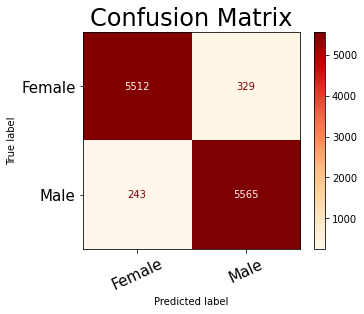

In [ ]:
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
    confusion_mtx = confusion_matrix(y_tr,y_pr)
    print(classification_report(y_tr, y_pr))
    print(confusion_mtx)
    labels = ['Female', 'Male']


    %matplotlib inline
    plt.rcParams['figure.figsize'] = (5.0, 4.0)
    plt.rcParams['font.size'] = 10
    display_c_m = ConfusionMatrixDisplay(confusion_mtx, display_labels=labels)
    display_c_m.plot(cmap='OrRd', xticks_rotation=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('Confusion Matrix', fontsize=24)
    plt.savefig('confusion_matrix.png', transparent=True, dpi=500)
    plt.show()
